In [ ]:
# atsisiųskite visus 
#  duomenis iš 
# https://data.gov.lt/datasets/509/
# 
# Užduotys:
# nuskaitykite visus failus į pandas DF (vienas DF vienam failui)
# Suraskite ir pateikite kitimą kas metus šių kriterijų:
# Dalyvių kiekis kiekvienais metais
# Apgadintų TP kiekis kas metus
# Žuvusių kiekis kiekvienais metais
#  Sužeistų kiekis kiekvienais metais
# Neblaivių bei apsvaigusių kaltininkų kiekio kaita kas metus
# Suraskite 3 populiariausias eismo įvykių schemas! 2023 metais (stulpelis schema2)
# ir pavaizduokite kitimą kas metus.
#  parodykite, kaip kito vyrų, moterų sukeltų EI kiekiai kas metus.
# parodykite, kaip kito neblaivių vyrų, moterų sukeltų EI kiekiai kas metus


# Kad būtų ką veikti - jei viską nuskaitysite taip paprastai į DF - python naudos ~ 3GB RAM.
# Pagalvokite, ką galima ir kur optimizuoti.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [2]:
dfs = {i:None for i in range(2013,2023)}
d = '../../../Darbalaukis/FAILAI/'
for key in dfs.keys():
    f = d+f'ei_{key}_12_31.json'
    print(f'R:{f}')
    df = pd.read_json(f)[['schema2','neblaivusKaltininkai', 'apsvaigeKaltininkai',
                          'dalyviuSkaicius','zuvusiuSkaicius','suzeistuSkaicius', 
                          'apgadintuTpSkaicius', 'eismoDalyviai']]
    dfs[key] = df

R:../../../Darbalaukis/FAILAI/ei_2013_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2014_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2015_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2016_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2017_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2018_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2019_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2020_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2021_12_31.json
R:../../../Darbalaukis/FAILAI/ei_2022_12_31.json


In [3]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='fivethirtyeight')

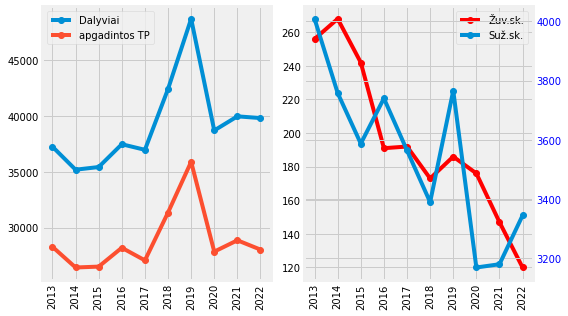

In [16]:
# Dalyvių kiekis kiekvienais metais
# Apgadintų TP kiekis kas metus
# Žuvusių kiekis kiekvienais metais
#  Sužeistų kiekis kiekvienais metais

dal, apTP, zuv, suz = [],[],[],[]
years = []
for year, df in dfs.items():
    years.append(year)
    dal.append(df['dalyviuSkaicius'].sum())
    apTP.append(df['apgadintuTpSkaicius'].sum())
    zuv.append(df['zuvusiuSkaicius'].sum())
    suz.append(df['suzeistuSkaicius'].sum())

fig, (axis, axis2) = plt.subplots(1,2,figsize=(8,4.5))
#plotting code:

ax2 = axis2.twinx()
axis.plot(years, dal, label='Dalyviai', marker='o')
axis.plot(years, apTP, label='apgadintos TP', marker='o')

line = axis2.plot(years, zuv, label='Žuv.sk.', marker='o', color='red')
line2 = ax2.plot(years, suz, label='Suž.sk.', marker='o')
axis.legend(loc='best')
lines = line+line2
labels = [l.get_label() for l in lines]
axis2.legend(lines, labels, loc='best')
#axis.ticklabel_format(style='plain')
axis.set_xticks(years)
axis2.set_xticks(years)
axis.tick_params(axis='x', rotation=90)
axis2.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='y', labelcolor='blue')
fig.tight_layout()
plt.show()


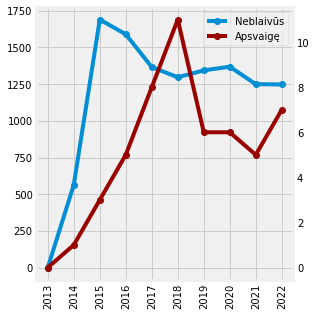

In [22]:
#  Neblaivių bei apsvaigusių kaltininkų kiekio kaita kas metus
years = []
nK = []
aK = []
for year, df in dfs.items():
    years.append(year)
    nbk = sum([1 for i in df['neblaivusKaltininkai'].values.tolist() if i == 'Taip'])
    abk = sum([1 for i in df['apsvaigeKaltininkai'].values.tolist() if i == 'Taip'])
    nK.append(nbk)
    aK.append(abk)

fig, axis = plt.subplots(figsize=(4.5,4.5))
#plotting code:
L=axis.plot(years, nK, label='Neblaivūs', marker='o')
ax2 = axis.twinx()
L2 = ax2.plot(years, aK, label='Apsvaigę', marker='o', color='xkcd:deep red')
Ls = L + L2
lbs = [i.get_label() for i in Ls]
ax2.grid(visible=False)
axis.legend(Ls, lbs, loc='best')
axis.set_xticks(years)
axis.tick_params(axis='x',rotation=90)
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()


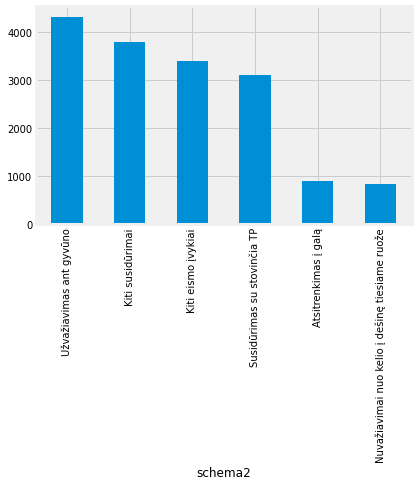

In [23]:
ax = dfs[2022]['schema2'].value_counts()[:6].plot(kind='bar')

['Užvažiavimas ant gyvūno', 'Kiti susidūrimai', 'Kiti eismo įvykiai']
{'Užvažiavimas ant gyvūno': [], 'Kiti susidūrimai': [], 'Kiti eismo įvykiai': []}


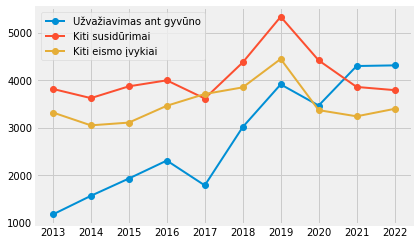

In [24]:
top3 = dfs[2022]['schema2'].value_counts()[:3].index.tolist()
print(top3)
years = [*range(2013,2023)]
t3 = {}
for i in top3:
    t3[i] = []
print(t3)

for i in top3:
    for k, df in dfs.items():
        t = df['schema2'].value_counts().reset_index().query('schema2 == @i')['count'].values[0]
        t3[i].append(t)

fig, ax = plt.subplots()
for schema, count in t3.items():
    ax.plot(years, count, label=schema, marker='o', lw=2)
ax.legend(loc='best')
ax.set_xticks(years)
ax.grid(visible=True)
plt.show()

In [1]:
# GMP duomenų analizė
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/b8d1b280f55e45b3b8596d833584c8e5_0/about
# 
#  Klausimai:
#  Ar buvo mėnesių, kurie išssikirtų gaisringumu?
#  Ar buvo mėnesių, kurie išssikirtų didelių gaisrų kiekiu? (2 ir daugiau autocisternos važiuoja) 

#  kokios vyraujančios 5 GMP kvietimo priežastys? Pateikite procentinį įvertinimą.
#  ar yra mėnesių, išsiskiriančių trukdančių skambučių gausa?
#  
#  pateikite top 5-kias priežastis, dėl kurių buvo kviesta policija.
#  Pateikite procentinį įvertinimą.

#  Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?
